# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create dataframe and add cities 
weather_df = pd.DataFrame({"City": cities, "Cloudiness": "", "Country": "", "Date": "",
                           "Humidity": "", "Lat": "", "Lng": "", "Max Temp": "", "Wind Speed": ""})

print("Beginning Data Retrieval")
print("-----------------------------")

#initiate record and set counter
record_counter = 0
set_counter = 0

#loop through rows in the dataframe
for index, row in weather_df.iterrows():
    cit = row["City"]
    url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}&units=imperial').format(cit, api_key)
    data = requests.get(url).json()
    
    #reset record counter when it reaches 50
    #increase record counter by 1 after every row
    if (record_counter % 50 == 0):
        record_counter = 0
        set_counter += 1
        
    record_counter += 1
    
    #input values into dataframe
    try:
        weather_df.loc[index, "Cloudiness"] = data["clouds"]["all"]
        weather_df.loc[index, "Country"] = data["sys"]["country"]
        weather_df.loc[index, "Date"] = str(data["dt"])
        weather_df.loc[index, "Humidity"] = data["main"]["humidity"]
        weather_df.loc[index, "Lat"] = data["coord"]["lat"]
        weather_df.loc[index, "Lng"] = data["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = data["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = data["wind"]["speed"]
        
        print(f"Processing Record {record_counter} of Set {set_counter} | {cit}")
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
        
print("-----------------------------")        
print("Data Retrieval Complete ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | olinda
Processing Record 3 of Set 1 | tezu
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | santa maria
Processing Record 6 of Set 1 | new norfolk
City not found... skipping.
Processing Record 8 of Set 1 | hovd
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | teguise
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | kuching
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | arraial do cabo
City not found... skipping.
Processing Record

Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | myaundzha
Processing Record 7 of Set 5 | mareeba
Processing Record 8 of Set 5 | aksarka
Processing Record 9 of Set 5 | touros
Processing Record 10 of Set 5 | ixtapa
City not found... skipping.
Processing Record 12 of Set 5 | nanortalik
Processing Record 13 of Set 5 | hofn
Processing Record 14 of Set 5 | khandyga
Processing Record 15 of Set 5 | smithers
Processing Record 16 of Set 5 | pacific grove
Processing Record 17 of Set 5 | alice springs
Processing Record 18 of Set 5 | dunedin
Processing Record 19 of Set 5 | sept-iles
City not found... skipping.
Processing Record 21 of Set 5 | mount gambier
Processing Record 22 of Set 5 | zanjan
City not found... skipping.
Processing Record 24 of Set 5 | yulara
Processing Record 25 of Set 5 | la libertad
Processing Record 26 of Set 5 | zhelyabovka
Processing Record 27 of Set 5 | okhotsk
Processing Record 28 of Set 5 | devonport
Processing Record 29 of Set 5 | vila velha
Pro

Processing Record 14 of Set 9 | pozo colorado
Processing Record 15 of Set 9 | patnos
Processing Record 16 of Set 9 | sisimiut
Processing Record 17 of Set 9 | atar
Processing Record 18 of Set 9 | lunglei
Processing Record 19 of Set 9 | isangel
City not found... skipping.
Processing Record 21 of Set 9 | atbasar
Processing Record 22 of Set 9 | huancavelica
Processing Record 23 of Set 9 | payo
Processing Record 24 of Set 9 | lazaro cardenas
Processing Record 25 of Set 9 | tinqueux
Processing Record 26 of Set 9 | mount isa
Processing Record 27 of Set 9 | harindanga
Processing Record 28 of Set 9 | plouzane
Processing Record 29 of Set 9 | esperance
Processing Record 30 of Set 9 | mugur-aksy
Processing Record 31 of Set 9 | nemuro
Processing Record 32 of Set 9 | san vicente
Processing Record 33 of Set 9 | harnosand
Processing Record 34 of Set 9 | usinsk
Processing Record 35 of Set 9 | evensk
Processing Record 36 of Set 9 | romitan
Processing Record 37 of Set 9 | udachnyy
Processing Record 38 of

Processing Record 16 of Set 13 | nyzy
Processing Record 17 of Set 13 | launceston
City not found... skipping.
Processing Record 19 of Set 13 | high level
Processing Record 20 of Set 13 | golyshmanovo
Processing Record 21 of Set 13 | cockburn town
Processing Record 22 of Set 13 | mayna
Processing Record 23 of Set 13 | inhambane
Processing Record 24 of Set 13 | lompoc
-----------------------------
Data Retrieval Complete 
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#remove empty rows
new_weather = weather_df.replace("", np.nan)
new_weather = new_weather.dropna()

#save data to csv file
new_weather.to_csv(output_data_file)
new_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,upernavik,73.0,GL,1560440387,58.0,72.79,-56.15,44.16,11.48
1,olinda,75.0,EC,1560440387,78.0,-2.03,-79.75,79.00,4.70
2,tezu,49.0,IN,1560440387,58.0,27.93,96.16,82.14,4.05
3,busselton,55.0,AU,1560440388,74.0,-33.64,115.35,52.00,12.26
4,santa maria,0.0,BR,1560440210,48.0,-29.69,-53.81,82.40,12.75
5,new norfolk,75.0,AU,1560440389,61.0,-42.78,147.06,50.00,8.05
7,hovd,40.0,NO,1560440390,55.0,63.83,10.70,66.20,32.21
8,bredasdorp,0.0,ZA,1560440390,44.0,-34.53,20.04,57.20,5.82
9,port elizabeth,90.0,US,1560440390,82.0,39.31,-74.98,70.00,11.41
10,yellowknife,75.0,CA,1560440391,72.0,62.45,-114.38,62.60,7.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

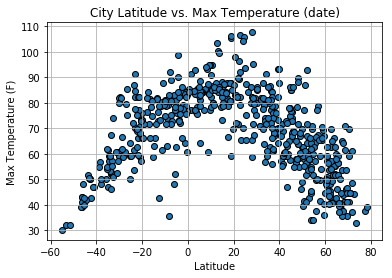

In [5]:
plt.scatter(new_weather["Lat"], new_weather["Max Temp"], edgecolors="black")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (date)")
plt.grid()
plt.savefig("images/latvstemp.png")
plt.show()

#### Latitude vs. Humidity Plot

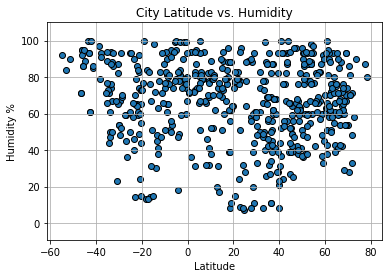

In [6]:
plt.scatter(new_weather["Lat"], new_weather["Humidity"], edgecolors="black")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.ylim(top = 110)
plt.savefig("images/latvshumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

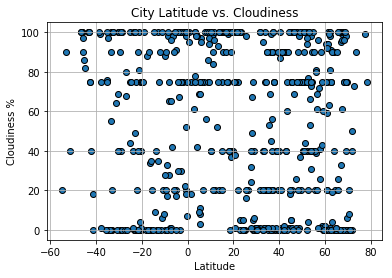

In [7]:
plt.scatter(new_weather["Lat"], new_weather["Cloudiness"], edgecolors="black")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig("images/latvscloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

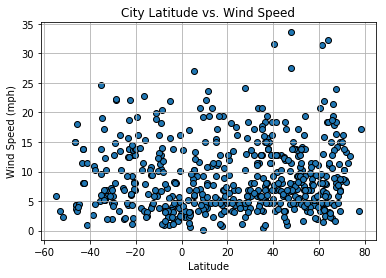

In [8]:
plt.scatter(new_weather["Lat"], new_weather["Wind Speed"], edgecolors="black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig("images/latvswindspeed.png")
plt.show()